# **Import TensorFlow and other necessary libraries**

---

Mount to drive for dataset extraction

In [1]:
from google.colab import files

# tensorflow utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models
# image processing
from PIL import Image
import numpy as np
# model evaluating
from sklearn.metrics import confusion_matrix, classification_report

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Google Drive mount
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# **Set the path and class names**

In [2]:
# Importing necessary libraries
import os
import glob
import random
import shutil
import zipfile
import pickle

# Set the path to the dataset
dataset_path = '/content/drive/MyDrive/dataku seng lengkap'

# Set the path to save the zip file
zip_save_path = '/content/drive/MyDrive/selected_images.zip'

# List of class names
class_names = ['Asam Jawa', 'Belimbing Wuluh', 'Biduri', 'Cocor Bebek', 'Jambu Air', 'Katuk', 'Kelor', 'Kemangi', 'Kersen', 'Lengkuas', 'Lidah Buaya', 'Mimba', 'Mint', 'Nangka', 'Pandan', 'Pepaya', 'Saga', 'Seledri', 'Sirih', 'Sirsak']


# **Extract 160 images each class for an even distribution and zip the dataset**

In [3]:
# Limit the image count to 160
max_images_per_class = 160

# Create a directory to store selected images
selected_images_dir = '/content/selected_images'
os.makedirs(selected_images_dir, exist_ok=True)

# Select 160 random images from the dataset for each class
for class_name in class_names:
    # Create a directory for each class
    class_dir = os.path.join(selected_images_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

    # Get the paths of all images for the current class
    data_path = os.path.join(dataset_path, class_name, '*')
    data_paths = glob.glob(data_path)

    # Randomly select 160 images for the current class
    selected_paths = random.sample(data_paths, min(max_images_per_class, len(data_paths)))

    # Copy selected images to the new directory
    for img_path in selected_paths:
        img_name = os.path.basename(img_path)
        new_img_path = os.path.join(class_dir, img_name)
        shutil.copy(img_path, new_img_path)

# Create a zip file
with zipfile.ZipFile(zip_save_path, 'w') as zipf:
    # Add all images from the selected directory to the zip file
    for root, dirs, files in os.walk(selected_images_dir):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, selected_images_dir))

# Remove the temporary directory with selected images
shutil.rmtree(selected_images_dir)

print(f"Zip file created and saved at: {zip_save_path}")




Zip file created and saved at: /content/drive/MyDrive/selected_images.zip


# **Extract Zip File**

In [4]:
# Limit the image count to 160
max_images_per_class = 160
# Path to the extracted folder
extracted_path = '/content/new_extracted_images'

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/selected_images.zip'

# Create a directory to extract the files
os.makedirs(extracted_path, exist_ok=True)

# Count the number of files for each class
class_file_count = {}

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Create subdirectories for each class
for class_name in class_names:
    class_dir = os.path.join(extracted_path, class_name)
    os.makedirs(class_dir, exist_ok=True)
    file_count = len(os.listdir(class_dir))
    class_file_count[class_name] = file_count
    print(f"Class: {class_name}, Number of files: {file_count}")

# Move images to their respective class subdirectories
for class_name in class_names:
    source_dir = os.path.join(extracted_path, class_name)
    destination_dir = os.path.join(extracted_path, class_name)

    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_dir, filename)
        shutil.move(source_path, destination_path)

Class: Asam Jawa, Number of files: 160
Class: Belimbing Wuluh, Number of files: 160
Class: Biduri, Number of files: 160
Class: Cocor Bebek, Number of files: 160
Class: Jambu Air, Number of files: 160
Class: Katuk, Number of files: 160
Class: Kelor, Number of files: 160
Class: Kemangi, Number of files: 160
Class: Kersen, Number of files: 160
Class: Lengkuas, Number of files: 160
Class: Lidah Buaya, Number of files: 160
Class: Mimba, Number of files: 160
Class: Mint, Number of files: 160
Class: Nangka, Number of files: 160
Class: Pandan, Number of files: 160
Class: Pepaya, Number of files: 160
Class: Saga, Number of files: 160
Class: Seledri, Number of files: 160
Class: Sirih, Number of files: 160
Class: Sirsak, Number of files: 160


# **Show data distribution**

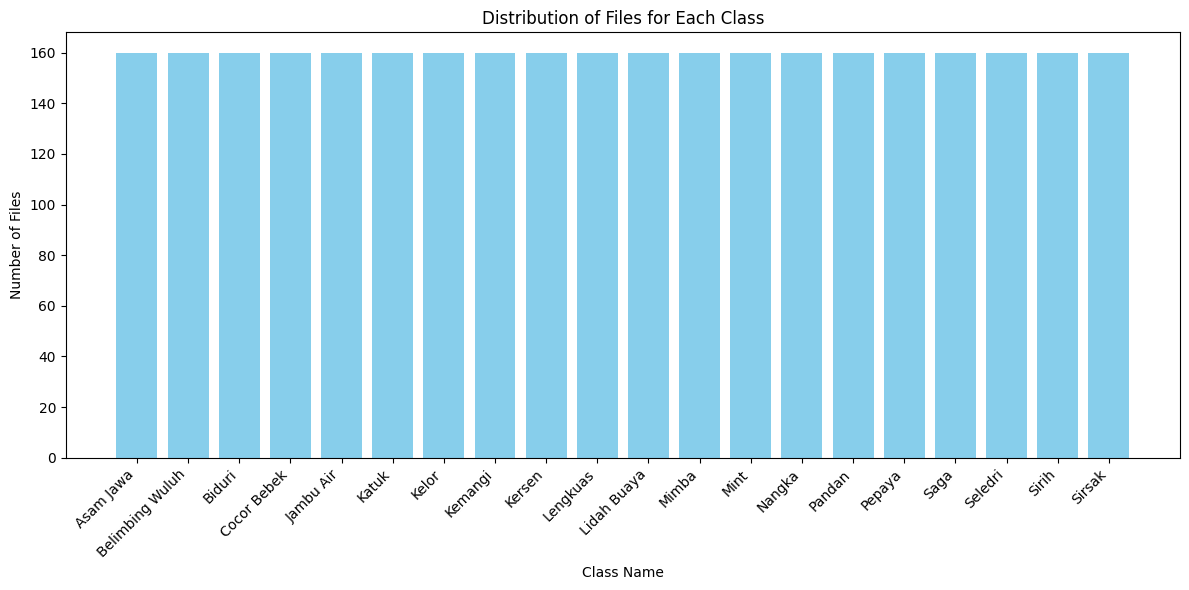

In [7]:
# Plotting the distribution of files for each class
plt.figure(figsize=(12, 6))
plt.bar(class_file_count.keys(), class_file_count.values(), color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Files')
plt.title('Distribution of Files for Each Class')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# **Init Methods**

In [5]:
# define method for showing plot learning curves
def plot_learning_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(6, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

# define confusion matrix method
def conf_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(class_names, rotation=45)
  ax.yaxis.set_ticklabels(class_names, rotation=45)

  plt.show()

# define classification report method
def class_report(y_test, y_pred):
  print("Labels: ", class_names)
  print()
  print(classification_report(y_test, y_pred))

# save model method
def saved_model(modelname, model):
  export_path = os.path.join(saved_model_dir, modelname)
  if os.path.isdir(export_path):
    print('\nAlready saved a model, replace to new model\n')
    shutil.rmtree(export_path, ignore_errors=True)

  model.save(export_path)
  print("Export path: ", export_path)
  print(os.listdir(export_path))

# save model history method
def saved_model_history(modelname, history):
  with open(os.path.join(saved_model_his, modelname), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# **ImageDataGenerator**


---

Images Pre-processing and Augmentation

In [8]:
data_path_final = '/content/new_extracted_images'
img_dim = 224
img_shape = (224, 224, 3)

datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.3,
    rotation_range = 0.2,
    zoom_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True,
)

val_datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.3
)
train_generator = datagen.flow_from_directory(
    data_path_final,
    target_size =(img_dim, img_dim),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'rgb',
    seed = 123,
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    data_path_final,
    target_size = (img_dim,img_dim),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    seed = 123,
    subset='validation',
    shuffle=False
)

Found 2240 images belonging to 20 classes.
Found 960 images belonging to 20 classes.


In [9]:
train_generator.class_indices

{'Asam Jawa': 0,
 'Belimbing Wuluh': 1,
 'Biduri': 2,
 'Cocor Bebek': 3,
 'Jambu Air': 4,
 'Katuk': 5,
 'Kelor': 6,
 'Kemangi': 7,
 'Kersen': 8,
 'Lengkuas': 9,
 'Lidah Buaya': 10,
 'Mimba': 11,
 'Mint': 12,
 'Nangka': 13,
 'Pandan': 14,
 'Pepaya': 15,
 'Saga': 16,
 'Seledri': 17,
 'Sirih': 18,
 'Sirsak': 19}

## **Set Label Name**

In [10]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)

class_names = labels
total_labels = len(labels)

print("Labels: {}".format(class_names))
print("Total labels: {}".format(total_labels))

Labels: ['Asam Jawa', 'Belimbing Wuluh', 'Biduri', 'Cocor Bebek', 'Jambu Air', 'Katuk', 'Kelor', 'Kemangi', 'Kersen', 'Lengkuas', 'Lidah Buaya', 'Mimba', 'Mint', 'Nangka', 'Pandan', 'Pepaya', 'Saga', 'Seledri', 'Sirih', 'Sirsak']
Total labels: 20


## **Show images sample**

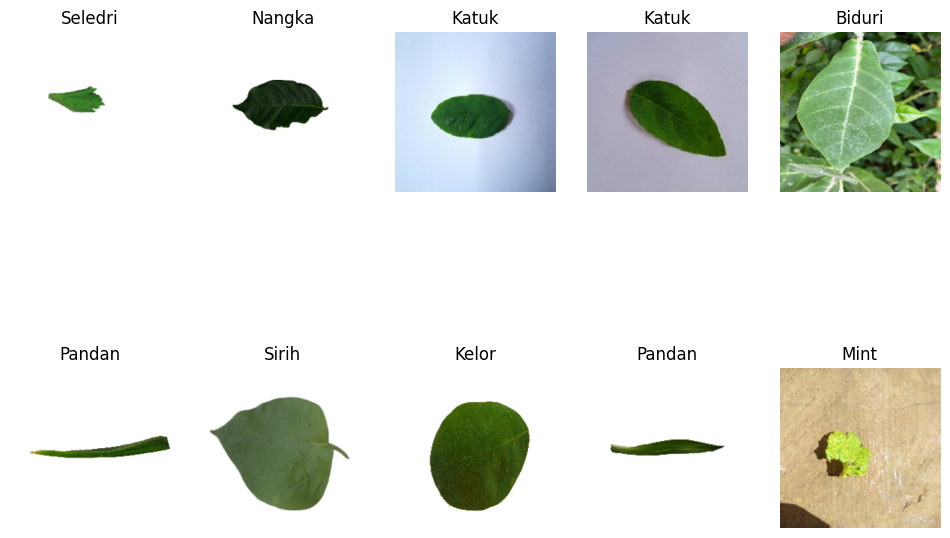

In [11]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Select 10 random indices
random_indices = np.random.choice(images.shape[0], size=10, replace=False)

# Display the randomly selected images
plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    ax = plt.subplot(2, 5, i + 1)

    # Reverse the normalization to display the images correctly
    plt.imshow((images[index] * 255).astype("uint8"))

    # Convert one-hot encoded label to class index
    class_index = np.argmax(labels[index])

    plt.title(class_names[class_index])
    plt.axis("off")

plt.show()


# **Model Building with DenseNet Transfer Learning**

In [12]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=img_shape),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(total_labels, activation='softmax')
])
model.layers[0].trainable = False
model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dropout (Dropout)           (None, 7, 7, 1024)        0         
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 7104404 (27.10 MB)
Trainable params: 66900 

In [13]:
learning_rate = 1e-3
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']
               )

In [14]:
ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= ACCURACY_THRESHOLD):
      print('Reached {} accuracy, stop training!'.format(ACCURACY_THRESHOLD))
      self.model.stop_training = True

In [15]:
modelpath1 = 'Transfer_learning_DenseNet121.h5'
checkpoint1 = ModelCheckpoint(modelpath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)
# Yes callback not punchline :D
callbacks_list1 = [checkpoint1, early_stopping, myCallback()] # 3 techniques :D

In [16]:
epoch = 500

history = model.fit(
    train_generator,
    epochs = epoch,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = callbacks_list1)

Epoch 1/500
35/35 [==============================] - ETA: 0s - loss: 1.8163 - accuracy: 0.5317
Epoch 1: val_accuracy improved from -inf to 0.72708, saving model to Transfer_learning_DenseNet121.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 113s 3s/step - loss: 1.8163 - accuracy: 0.5317 - val_loss: 1.0569 - val_accuracy: 0.7271
Epoch 2/500
35/35 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.8817
Epoch 2: val_accuracy improved from 0.72708 to 0.84271, saving model to Transfer_learning_DenseNet121.h5
35/35 [==============================] - 94s 3s/step - loss: 0.5629 - accuracy: 0.8817 - val_loss: 0.5654 - val_accuracy: 0.8427
Epoch 3/500
35/35 [==============================] - ETA: 0s - loss: 0.2927 - accuracy: 0.9491
Epoch 3: val_accuracy improved from 0.84271 to 0.90208, saving model to Transfer_learning_DenseNet121.h5
35/35 [==============================] - 93s 3s/step - loss: 0.2927 - accuracy: 0.9491 - val_loss: 0.3784 - val_accuracy: 0.9021
Epoch 4/500
35/35 [==============================] - ETA: 0s - loss: 0.1981 - accuracy: 0.9679
Epoch 4: val_accuracy improved from 0.90208 to 0.92396, saving model to Transfer_learning_DenseNet121.h5
35/35 [=====

In [17]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

30/30 [==============================] - 22s 592ms/step - loss: 0.1664 - accuracy: 0.9448
Accuracy (train):  0.9986607432365417
Accuracy (test): 0.9447916746139526
Loss (train):  0.015482633374631405
Loss (test): 0.1663888841867447


# **Plot Learning Curves**

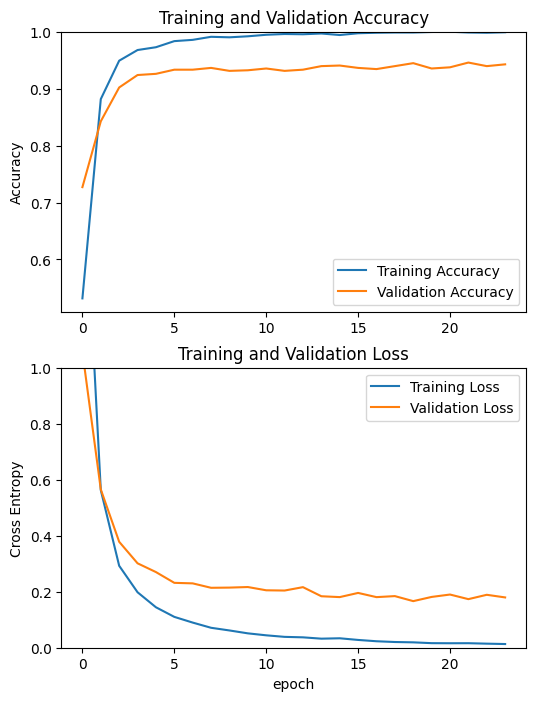

In [18]:
plot_learning_curves(history)

# **Fine Tuning**

In [36]:
model.layers[0].trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers[0].layers))

# Fine-tune from this layer onwards
fine_tune_at = 420

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[0].layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  427


In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']
               )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dropout (Dropout)           (None, 7, 7, 1024)        0         
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 7104404 (27.10 MB)
Trainable params: 233044 (910.33 KB)
Non-trainable params: 6871360 (26.21 MB)
___________

In [38]:
fine_tune_epochs = 10
total_epochs = 24 + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_generator,
                         callbacks = callbacks_list1)

Epoch 24/34
35/35 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9996
Epoch 24: val_accuracy did not improve from 0.94583
35/35 [==============================] - 107s 3s/step - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.1812 - val_accuracy: 0.9417
Epoch 25/34
35/35 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9987
Epoch 25: val_accuracy did not improve from 0.94583
35/35 [==============================] - 85s 2s/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.1829 - val_accuracy: 0.9427
Epoch 26/34
35/35 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9991
Epoch 26: val_accuracy did not improve from 0.94583
35/35 [==============================] - 88s 3s/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.1703 - val_accuracy: 0.9438
Epoch 27/34
35/35 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 27: val_accuracy did not improve from 0.94583
35/35 [=================

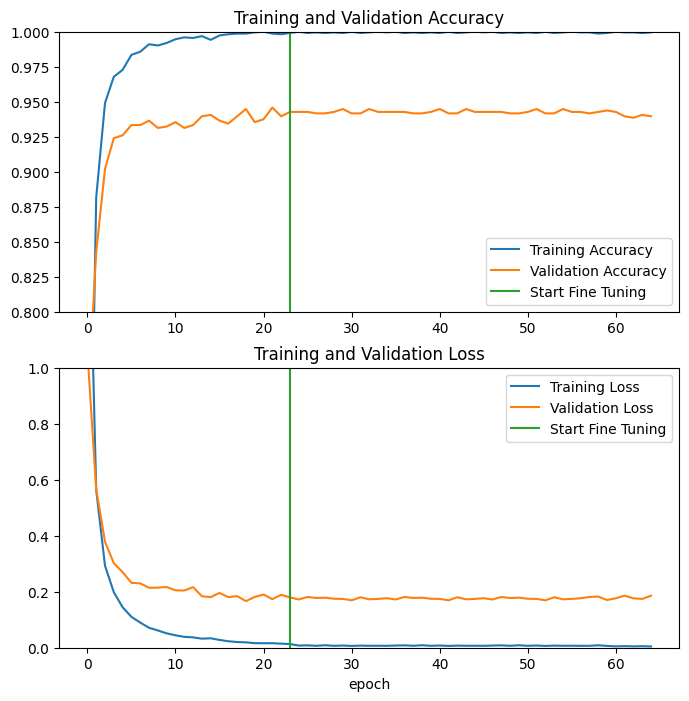

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([24-1,24-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([24-1,24-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [40]:

y_test = validation_generator.classes
y_pred = model.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

<ipython-input-40-3ac1b94b252a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator)


In [41]:
def conf_matrix(y_test, y_pred, class_names):
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Set the ticks and labels for x-axis
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha="right")

    # Set the ticks and labels for y-axis
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_yticklabels(class_names, rotation=0)

    plt.show()


# **Confusion Matrix & Classification Report**

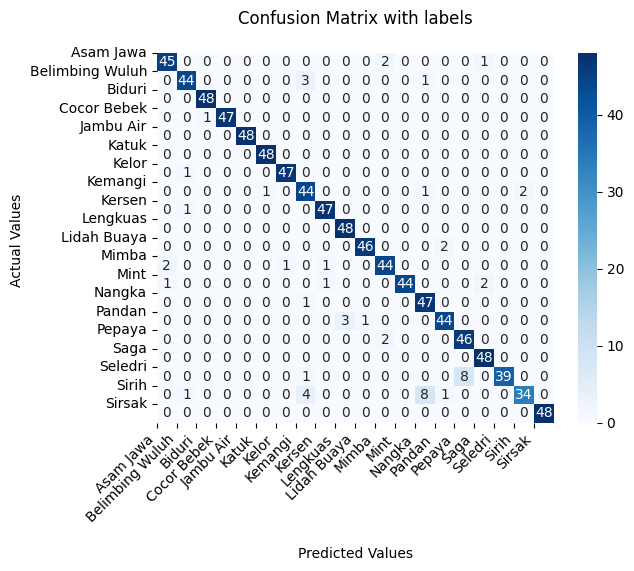

In [42]:
# Get the actual class names from the generator
actual_class_names = list(validation_generator.class_indices.keys())

# Check if the actual class names match the expected class names
if set(class_names) == set(actual_class_names):
    # Use the actual class names for confusion matrix
    conf_matrix(y_test, y_pred, actual_class_names)
else:
    print("Mismatch between expected and actual class names.")


In [43]:
# show classification report
class_report(y_test, y_pred)

Labels:  ['Asam Jawa', 'Belimbing Wuluh', 'Biduri', 'Cocor Bebek', 'Jambu Air', 'Katuk', 'Kelor', 'Kemangi', 'Kersen', 'Lengkuas', 'Lidah Buaya', 'Mimba', 'Mint', 'Nangka', 'Pandan', 'Pepaya', 'Saga', 'Seledri', 'Sirih', 'Sirsak']

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.94      0.92      0.93        48
           2       0.98      1.00      0.99        48
           3       1.00      0.98      0.99        48
           4       1.00      1.00      1.00        48
           5       0.98      1.00      0.99        48
           6       0.98      0.98      0.98        48
           7       0.83      0.92      0.87        48
           8       0.96      0.98      0.97        48
           9       0.94      1.00      0.97        48
          10       0.98      0.96      0.97        48
          11       0.92      0.92      0.92        48
          12       1.00      0.92      0.96        48
          1

Saving cf59f31c5cd63242b4740c53245dfd5a.jpg_720x720q80.jpg to cf59f31c5cd63242b4740c53245dfd5a.jpg_720x720q80.jpg
1/1 [==============================] - 8s 8s/step
cf59f31c5cd63242b4740c53245dfd5a.jpg_720x720q80.jpg
Mimba


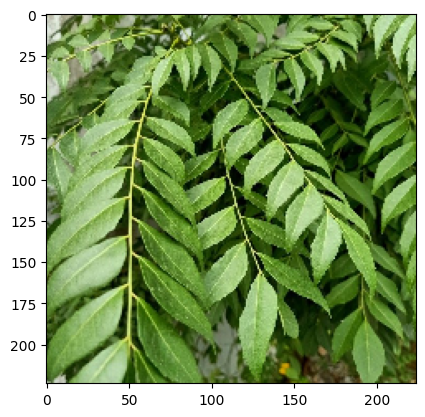

In [ ]:
from google.colab import files
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    prob = model.predict(images)[0]
    classes = int(prob.argmax(axis=-1))
    print(fn)
    print(class_names[classes])

In [44]:
model.save(os.path.join('drive/MyDrive', 'Transfer_learning_DenseNet121.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_model_path = '/content/drive/MyDrive/Transfer_learning_DenseNet121.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved at: {tflite_model_path}")